<a href="https://colab.research.google.com/github/sakinjangpgc/Machine-learning-Algorithm-in-Python/blob/main/DecisionTreeClassifier_for_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries and set option
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
#supervised learning
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics, preprocessing
df=pd.read_csv('/content/data.csv', index_col=False)
df.drop('Unnamed: 32',axis=1,inplace= True)
df.drop('id',axis=1, inplace=True)


array=df.values
x=array[:,1:31]
y=array[:,0]
#tronsform the class labels from therir orignal string representation M and B into integer
le=LabelEncoder()
y=le.fit_transform(y)
#split the dataset in train and test group
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25, random_state=7)
#To print the shape of data
xtrain.shape, ytrain.shape,xtest.shape,ytest.shape
#feature standarization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
# To reduce the daimentnality to only 20 features we have
pca=PCA(n_components=20)
pca=pca.fit(x)
print(pca)

PCA(n_components=20)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
 #creat an descision tree  classifiar and train it on data set
clf1=DecisionTreeClassifier(random_state=0)
clf1.fit(xtrain,ytrain)
#analyes accuracy of prediction on test data
classifie_score1=clf1.score(xtest,ytest)
print(" the classifier accuracy score is{:03.2f} \n".format(classifie_score1))

 the classifier accuracy score is0.93 



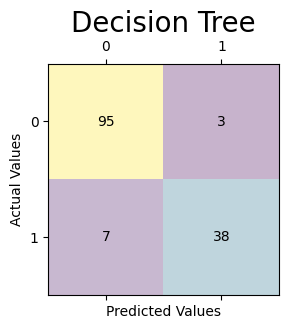

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.93      0.84      0.88        45

    accuracy                           0.93       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
ypred=clf1.predict(xtest)
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(ytest, ypred)

fig, axs = plt.subplots(figsize=(3, 3))
axs.matshow(cm, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         axs.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.title("Decision Tree", size=20)
plt.show()
print(classification_report(ytest, ypred ))